In [86]:
#Importing the required lib

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
     


In [87]:
#Reading CSV file

df = pd.read_csv(r"C:\Users\Tarun\Documents\dataset\drug200.csv")

# Visualizing the 1st 5 observations

df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [3]:
# Visualizing the last 5 observations
df.tail()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX
199,40,F,LOW,NORMAL,11.349,drugX


In [4]:

df.describe(include='all')

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
count,200.000000,200,200,200,200.000000,200
unique,NaN,2,3,2,NaN,5
top,NaN,M,HIGH,HIGH,NaN,DrugY
freq,NaN,104,77,103,NaN,91
mean,44.315000,NaN,NaN,NaN,16.084485,NaN
std,16.544315,NaN,NaN,NaN,7.223956,NaN
min,15.000000,NaN,NaN,NaN,6.269000,NaN
25%,31.000000,NaN,NaN,NaN,10.445500,NaN
50%,45.000000,NaN,NaN,NaN,13.936500,NaN
75%,58.000000,NaN,NaN,NaN,19.380000,NaN


In [5]:

# Check the null values

df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [ ]:
# We are not having any null values so we can skip the handling null value step.

In [6]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


<Axes: >

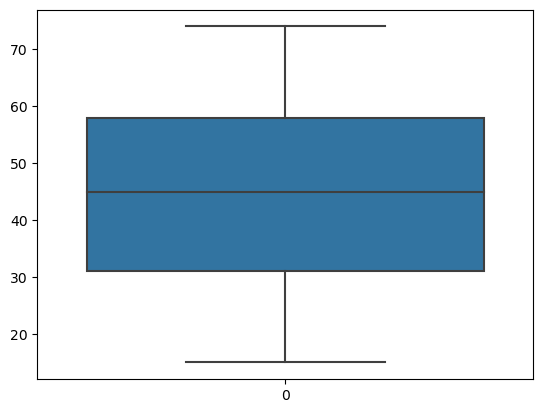

In [88]:


sns.boxplot(df['Age'])

<Axes: >

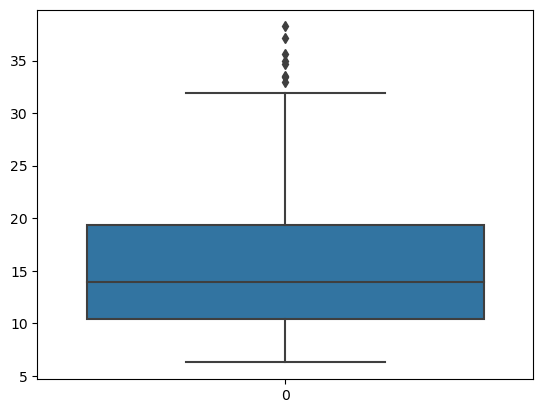

In [89]:


sns.boxplot(df['Na_to_K'])

<Axes: >

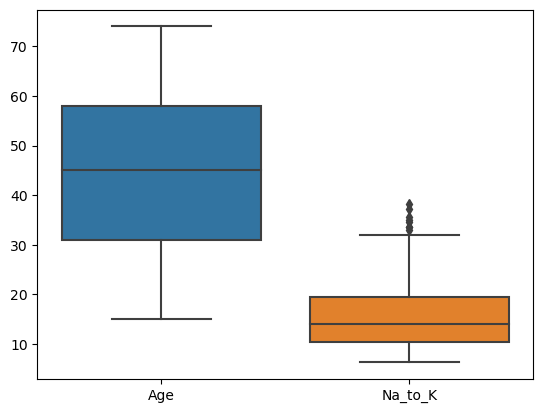

In [90]:

sns.boxplot(df)

In [91]:
#Outlier removal
q1 = df.Na_to_K.quantile(0.25)
q3 = df.Na_to_K.quantile(0.75)

<Axes: >

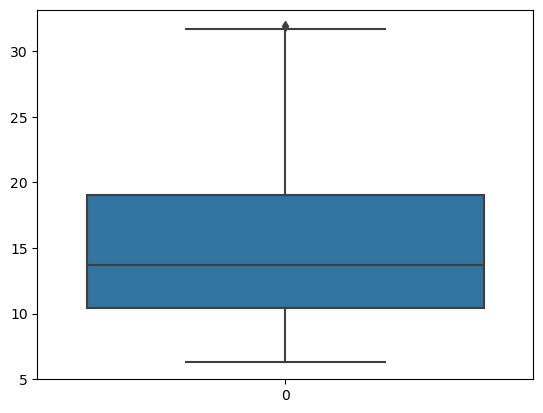

In [92]:
IQR = q3 - q1
upper_limit = q3+1.5*IQR
lower_limit = q1-1.5*IQR
df = df[df.Na_to_K<upper_limit]
sns.boxplot(df.Na_to_K)

In [ ]:
#Outliers removed

In [105]:


#Dependant value = drug
y = df['Drug']
y.head()
     
     

0    DrugY
1    drugC
2    drugC
3    drugX
4    DrugY
Name: Drug, dtype: object

In [169]:
X = df.drop(columns = ['Drug'],axis=1)
Y = df['Drug']

In [178]:
Y_class = len(np.unique(Y))
print(Y_class)

5


In [170]:
X = pd.get_dummies(X,columns=['Sex','BP','Cholesterol'],drop_first = True)

LE = LabelEncoder()
Y = LE.fit_transform(Y)

In [171]:
X_train, X_test, Y_train, Y_test = train_test_split (X,Y,test_size=0.3,random_state=2)

In [172]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [176]:
import keras
import keras.utils
from keras import utils as np_utils

Y_train = keras.utils.to_categorical(Y_train)
Y_test = keras.utils.to_categorical(Y_test)

In [179]:
model = Sequential()
model.add(Dense(48, input_dim=6, activation='relu'))
model.add(Dense(36, activation='relu'))
model.add(Dense(24, activation='relu'))
model.add(Dense(12, activation='relu'))
output_layer = Dense(Y_class,activation='softmax')
model.add(output_layer)

In [180]:
model.summary()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_93 (Dense)            (None, 48)                336       
                                                                 
 dense_94 (Dense)            (None, 36)                1764      
                                                                 
 dense_95 (Dense)            (None, 24)                888       
                                                                 
 dense_96 (Dense)            (None, 12)                300       
                                                                 
 dense_97 (Dense)            (None, 5)                 65        
                                                                 
Total params: 3,353
Trainable params: 3,353
Non-trainable params: 0
_________________________________________________________________


In [184]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [185]:
model.fit(X_train,Y_train,epochs=48,batch_size=6)

Epoch 1/48
23/23 [==============================] - 0s 1ms/step - loss: 0.0081 - accuracy: 1.0000
Epoch 2/48
23/23 [==============================] - 0s 1ms/step - loss: 0.0068 - accuracy: 1.0000
Epoch 3/48
23/23 [==============================] - 0s 1ms/step - loss: 0.0088 - accuracy: 1.0000
Epoch 4/48
23/23 [==============================] - 0s 1ms/step - loss: 0.0036 - accuracy: 1.0000
Epoch 5/48
23/23 [==============================] - 0s 1ms/step - loss: 0.0040 - accuracy: 1.0000
Epoch 6/48
23/23 [==============================] - 0s 1ms/step - loss: 0.0047 - accuracy: 1.0000
Epoch 7/48
23/23 [==============================] - 0s 1ms/step - loss: 0.0025 - accuracy: 1.0000
Epoch 8/48
23/23 [==============================] - 0s 1ms/step - loss: 0.0032 - accuracy: 1.0000
Epoch 9/48
23/23 [==============================] - 0s 1ms/step - loss: 0.0059 - accuracy: 1.0000
Epoch 10/48
23/23 [==============================] - 0s 1ms/step - loss: 0.0047 - accuracy: 1.0000
Epoch 11/48
23/23 [

In [186]:
test_loss, test_acc = model.evaluate(X_test, Y_test)
print('Test accuracy:', test_acc * 100)

2/2 [==============================] - 0s 3ms/step - loss: 0.4262 - accuracy: 0.9138
Test accuracy: 91.37930870056152


In [191]:
from numpy import array
Xnew = array([[23,'F', 'HIGH', 'HIGH',25.355]])

# make a prediction
ynew = model.predict_classes(Xnew)
# show the inputs and predicted outputs
print("X=%s, Predicted=%s" % (Xnew[0], ynew[0]))

AttributeError: 'Sequential' object has no attribute 'predict_classes'